Combined Sales Data:
  Branch       City Customer type  Gender            Product line  Unit price  \
0      A     Yangon        Member  Female       Health and beauty       74.69   
1      C  Naypyitaw        Normal  Female  Electronic accessories       15.28   
2      A     Yangon        Normal    Male      Home and lifestyle       46.33   
3      A     Yangon        Member    Male       Health and beauty       58.22   
4      A     Yangon        Normal    Male       Sports and travel       86.31   

   Quantity   Tax 5%     Total       Date   Time      Payment    cogs  \
0         7  26.1415  548.9715   1/5/2019  13:08      Ewallet  522.83   
1         5   3.8200   80.2200   3/8/2019  10:29         Cash   76.40   
2         7  16.2155  340.5255   3/3/2019  13:23  Credit card  324.31   
3         8  23.2880  489.0480  1/27/2019  20:33      Ewallet  465.76   
4         7  30.2085  634.3785   2/8/2019  10:37      Ewallet  604.17   

   gross margin percentage  gross income  Rating  
0 

/var/folders/86/ggmx90711p73pr1jqt5jz51h0000gn/T/ipykernel_79362/1688290368.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['Rating'].fillna(combined_data['Rating'].mean(), inplace=True)
/var/folders/86/ggmx90711p73pr1jqt5jz51h0000gn/T/ipykernel_79362/1688290368.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

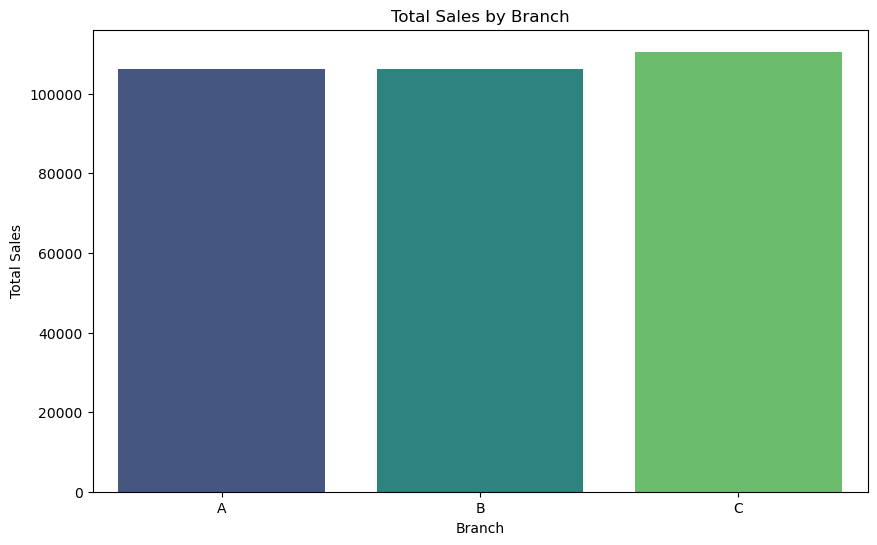

/var/folders/86/ggmx90711p73pr1jqt5jz51h0000gn/T/ipykernel_79362/1688290368.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating_by_product_line, x='Product line', y='Rating', palette='Blues')


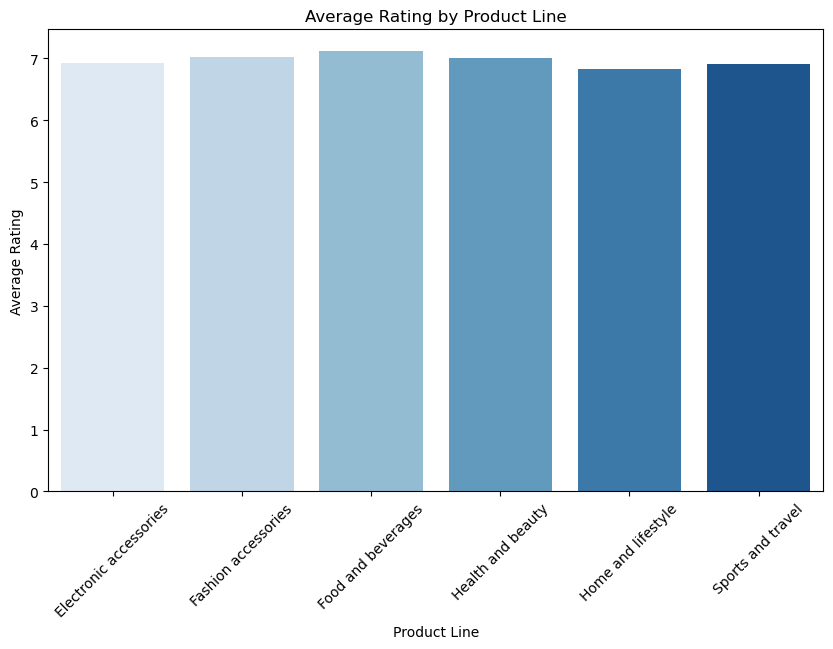

/var/folders/86/ggmx90711p73pr1jqt5jz51h0000gn/T/ipykernel_79362/1688290368.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_profit_by_city, x='City', y='Total Profit', palette='magma')


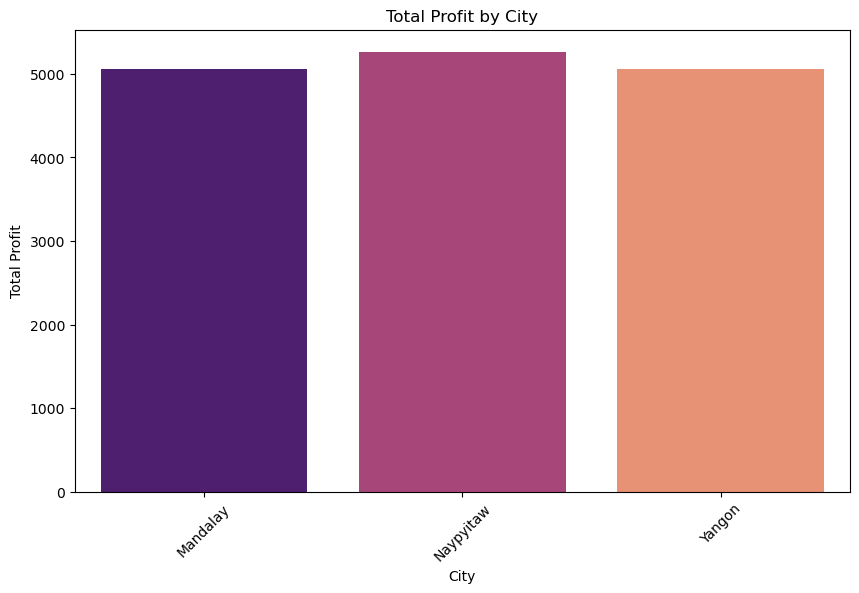

/var/folders/86/ggmx90711p73pr1jqt5jz51h0000gn/T/ipykernel_79362/1688290368.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_count_by_payment, x='Payment Method', y='Count', palette='coolwarm')


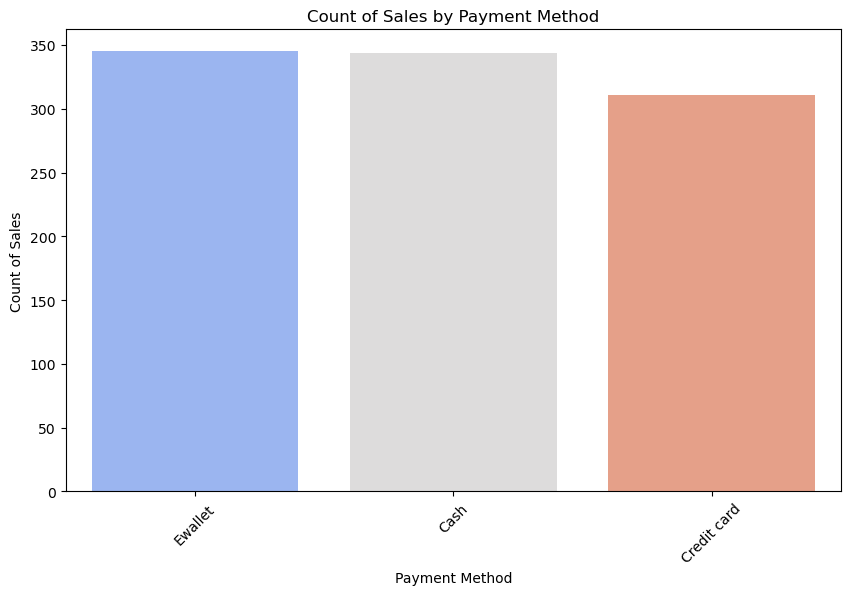

In [2]:
#DMV-1


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Data from Multiple Formats
csv_data = pd.read_csv('sales data.csv')
excel_data = pd.read_excel('sales data.xlsx')
json_data = pd.read_json('sales data.json')

# Combine all datasets into one DataFrame
combined_data = pd.concat([csv_data, excel_data, json_data], ignore_index=True)

# Display the first few rows of the combined dataset
print("Combined Sales Data:")
print(combined_data.head())

# Step 2: Data Cleaning
# Convert 'Date' to datetime format
combined_data['Date'] = pd.to_datetime(combined_data['Date'], format='%d-%m-%Y', errors='coerce')

# Check for missing values
print("\nMissing values in each column:")
print(combined_data.isnull().sum())

# Fill missing values (Example strategy: Fill with mean for numerical, mode for categorical)
combined_data['Rating'].fillna(combined_data['Rating'].mean(), inplace=True)
combined_data['Customer type'].fillna(combined_data['Customer type'].mode()[0], inplace=True)

# Drop rows where 'Total' or 'Unit price' is missing
combined_data.dropna(subset=['Total', 'Unit price'], inplace=True)

# Check the data types
print("\nData types:")
print(combined_data.dtypes)

# Step 3: Data Transformation
# Convert 'Gender' and 'Customer type' to categorical
combined_data['Gender'] = combined_data['Gender'].astype('category')
combined_data['Customer type'] = combined_data['Customer type'].astype('category')
# Create a new column for 'Total Profit' (Total - cogs)
combined_data['Total Profit'] = combined_data['Total'] - combined_data['cogs']

# Create a new column for 'Sales Month'
combined_data['Sales Month'] = combined_data['Date'].dt.month

print("-------------------------------------------")
print(combined_data.head())

# Step 4: Data Analysis
# Total sales by branch
total_sales_by_branch = combined_data.groupby('Branch')['Total'].sum().reset_index()

# Average rating by product line
average_rating_by_product_line = combined_data.groupby('Product line')['Rating'].mean().reset_index()

# Total profit by city
total_profit_by_city = combined_data.groupby('City')['Total Profit'].sum().reset_index()

# Count of sales by payment method
sales_count_by_payment = combined_data['Payment'].value_counts().reset_index()
sales_count_by_payment.columns = ['Payment Method', 'Count']

# Display results
print("\nTotal Sales by Branch:")
print(total_sales_by_branch)

print("\nAverage Rating by Product Line:")
print(average_rating_by_product_line)

print("\nTotal Profit by City:")
print(total_profit_by_city)

print("\nCount of Sales by Payment Method:")
print(sales_count_by_payment)

# Step 5: Visualization of Results
# Set up visualizations
plt.figure(figsize=(10, 6))
sns.barplot(data=total_sales_by_branch, x='Branch', y='Total', palette='viridis')
plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_rating_by_product_line, x='Product line', y='Rating', palette='Blues')
plt.title('Average Rating by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=total_profit_by_city, x='City', y='Total Profit', palette='magma')
plt.title('Total Profit by City')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=sales_count_by_payment, x='Payment Method', y='Count', palette='coolwarm')
plt.title('Count of Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count of Sales')
plt.xticks(rotation=45)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Names      6 non-null      object 
 1   Max_Temp   6 non-null      float64
 2   Min_Temp   6 non-null      float64
 3   Humidity   6 non-null      int64  
 4   WindSpeed  6 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 372.0+ bytes


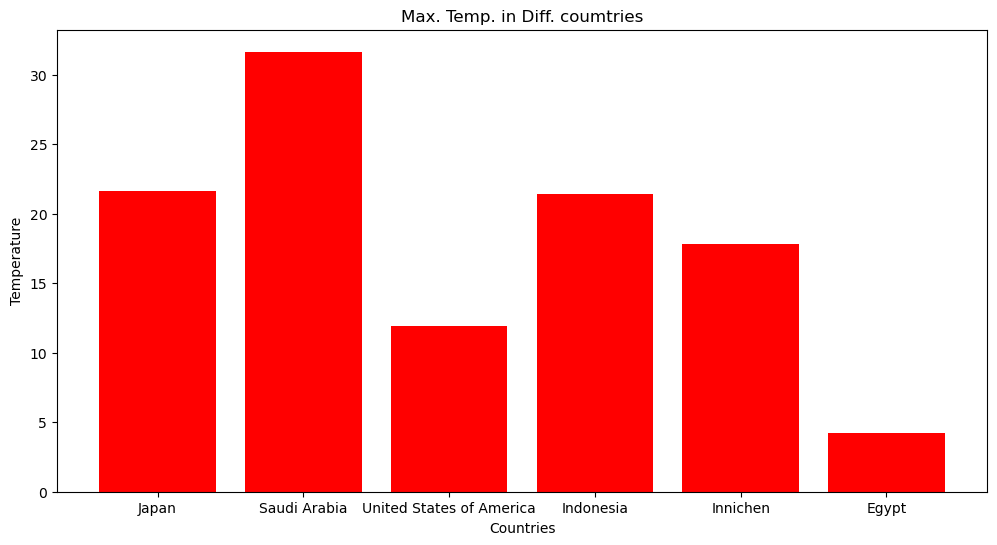

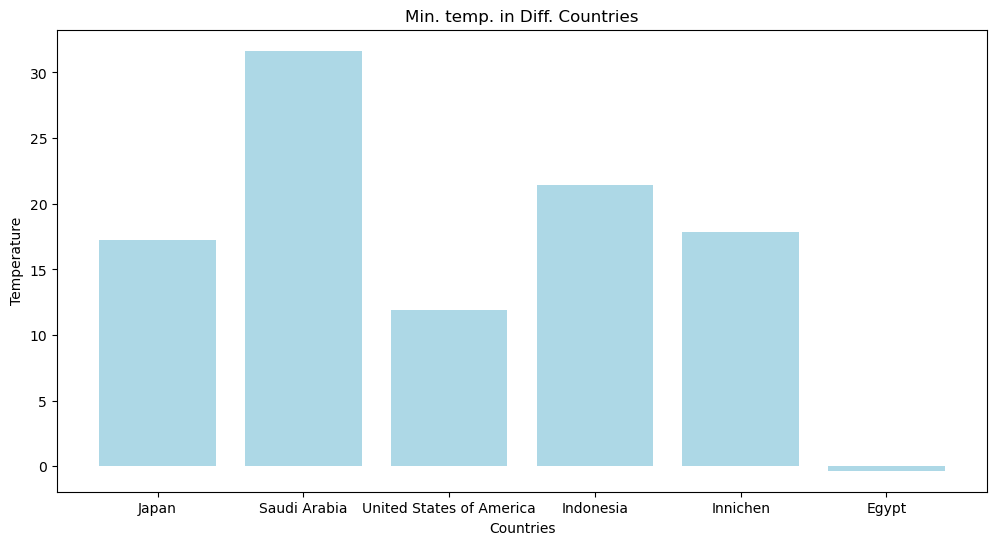

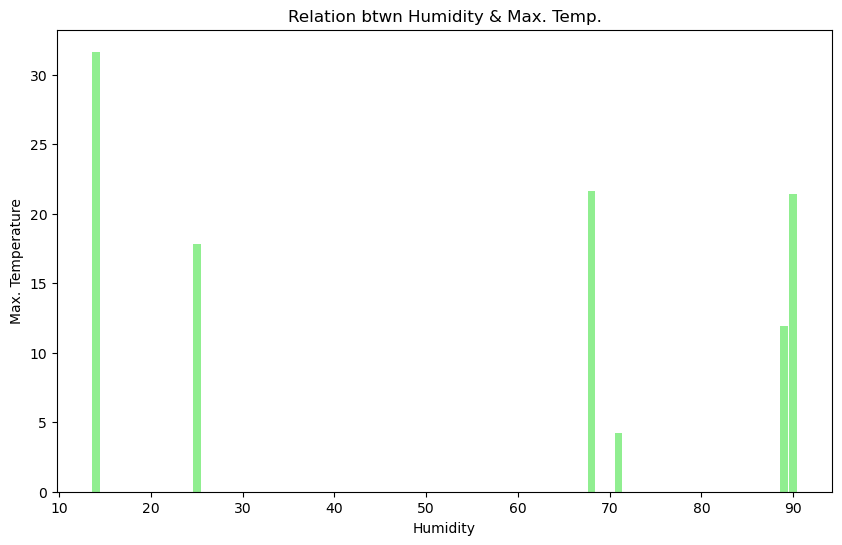

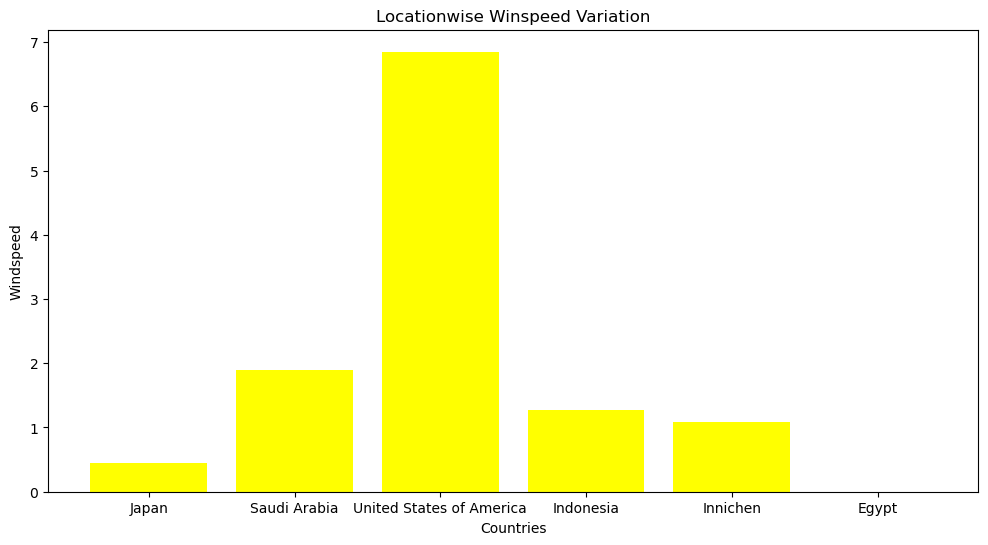

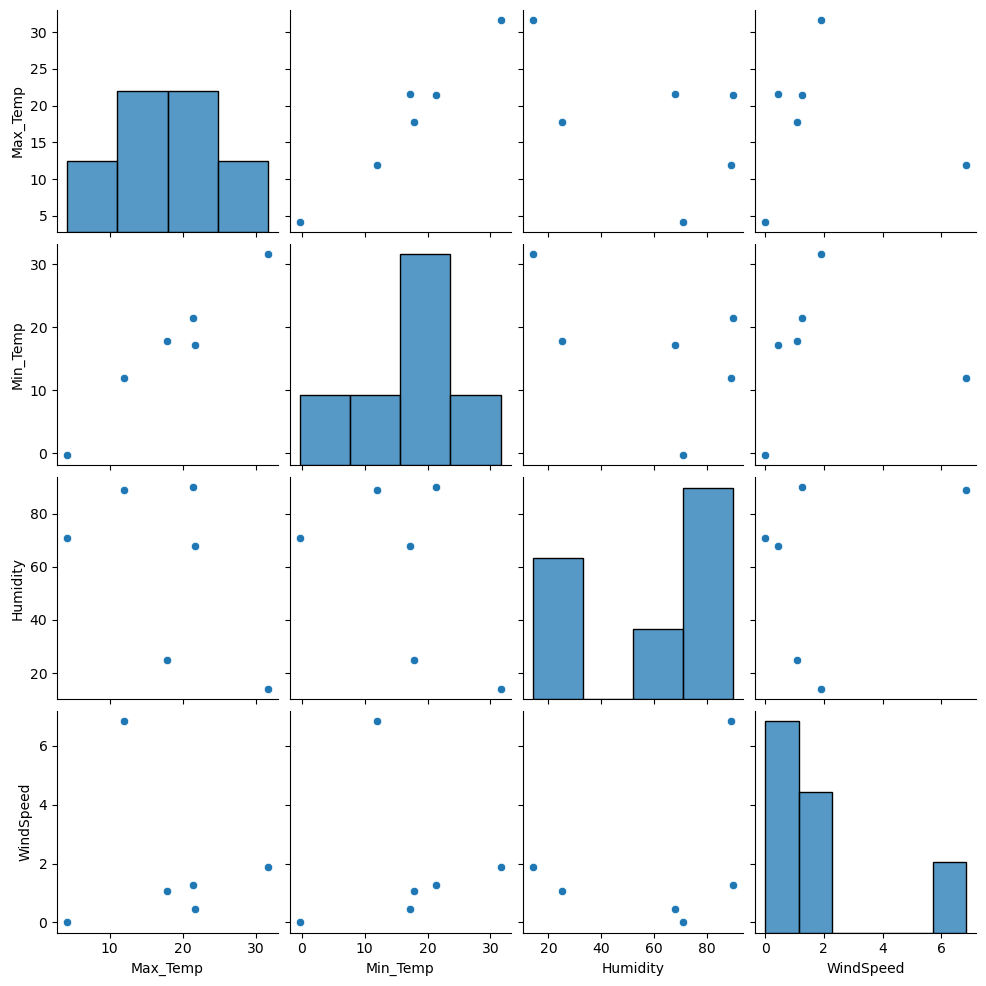

In [4]:
#2

import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

API_key = '91dc4e027d565d766d090eec6efb196c'
countries = ['Japan' , 'Saudi Arabia' , 'United States of America' , 'Indonesia' , 'India' , 'Egypt']

country_name_list = []
maxtemp = []
mintemp = []
humidity = []
windspeed = []

for country_names in countries:
    url = f"https://api.openweathermap.org/data/2.5/weather?q={country_names}&appid={API_key}&units=metric"

    r = requests.get(url)

    data = r.json()

    formatted_json = json.dumps(data, sort_keys=True, indent=4)

    country_name_list.append(data['name'])
    maxtemp.append(data['main']['temp_max'])
    mintemp.append(data['main']['temp_min'])
    humidity.append(data['main']['humidity'])
    windspeed.append(data['wind']['speed'])

df = pd.DataFrame()
df['Names'] = country_name_list
df['Max_Temp'] = maxtemp
df['Min_Temp'] = mintemp
df['Humidity'] = humidity
df['WindSpeed'] = windspeed

df.head()
df
df.describe()
df.info()
df.duplicated().sum()

average_temperature = df.groupby('Names')['Max_Temp'].mean()
average_temperature

average_temperature = df.groupby('Names')['Min_Temp'].mean()
average_temperature

plt.figure(figsize=(12,6))
plt.bar(df['Names'],df['Max_Temp'], color = 'red')
plt.title('Max. Temp. in Diff. coumtries')
plt.xlabel('Countries')
plt.ylabel('Temperature')
plt.show()

plt.figure(figsize=(12,6))
plt.bar(df['Names'],df['Min_Temp'],color = 'lightblue')
plt.title('Min. temp. in Diff. Countries')
plt.xlabel('Countries')
plt.ylabel('Temperature')
plt.show()

plt.figure(figsize=(10,6))
plt.bar(df['Humidity'],df['Max_Temp'],color='lightgreen')
plt.title('Relation btwn Humidity & Max. Temp.')
plt.xlabel('Humidity')
plt.ylabel('Max. Temperature')
plt.show()

plt.figure(figsize=(12,6))
plt.bar(df['Names'],df['WindSpeed'],color='yellow')
plt.title('Locationwise Winspeed Variation')
plt.xlabel('Countries')
plt.ylabel('Windspeed')
plt.show()

sns.pairplot(df)
plt.show()

Initial Data Overview:
   customer_id telecom_partner gender  age              state     city  \
0            1    Reliance Jio      F   25          Karnataka  Kolkata   
1            2    Reliance Jio      F   55            Mizoram   Mumbai   
2            3        Vodafone      F   57  Arunachal Pradesh    Delhi   
3            4            BSNL      M   46         Tamil Nadu  Kolkata   
4            5            BSNL      F   26            Tripura    Delhi   

   pincode date_of_registration  num_dependents  estimated_salary  calls_made  \
0   755597           2020-01-01               4            124962          44   
1   125926           2020-01-01               2            130556          62   
2   423976           2020-01-01               0            148828          49   
3   522841           2020-01-01               1             38722          80   
4   740247           2020-01-01               2             55098          78   

   sms_sent  data_used  churn  
0        45  

/var/folders/86/ggmx90711p73pr1jqt5jz51h0000gn/T/ipykernel_79362/3300651643.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['data_used'].fillna(data['data_used'].median(), inplace=True)


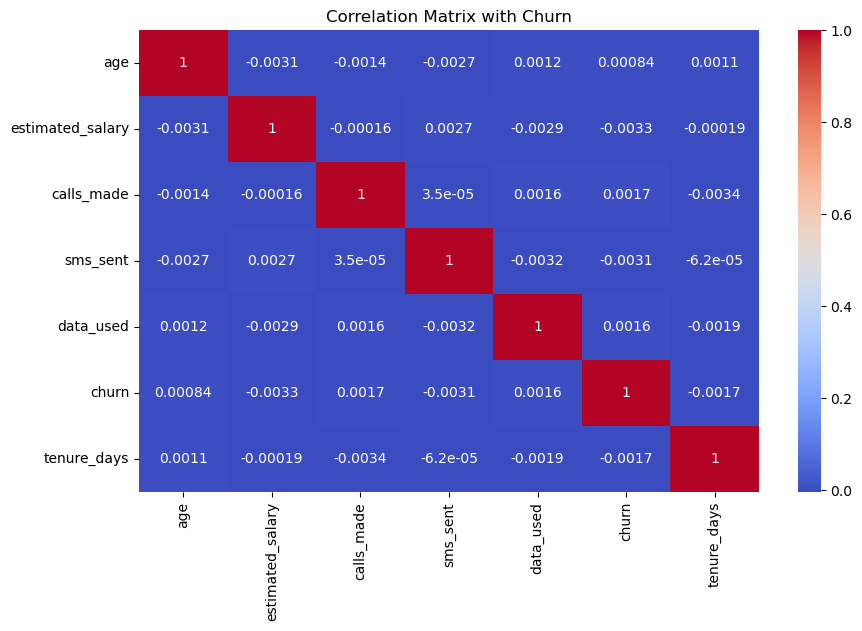

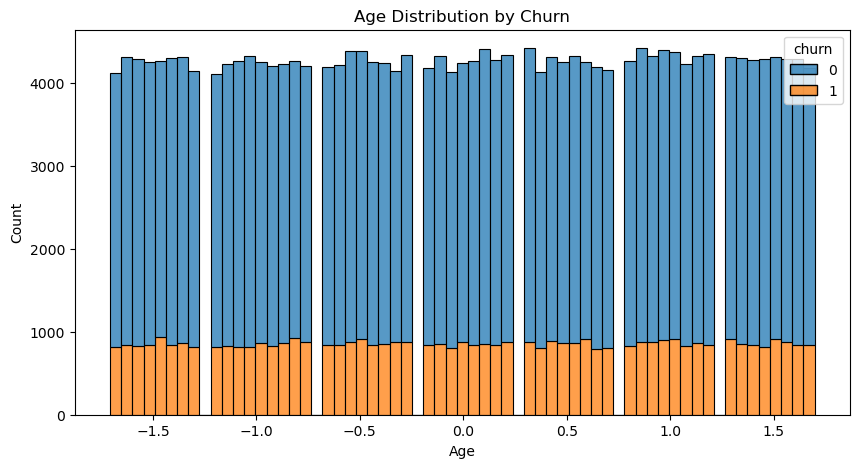


Average Key Features by Churn Status:
            age  estimated_salary  calls_made  sms_sent  data_used  \
churn                                                                
0     -0.000420          0.001669   -0.000847  0.001538  -0.000780   
1      0.001676         -0.006655    0.003379 -0.006135   0.003113   

       tenure_days  
churn               
0         0.000827  
1        -0.003297  


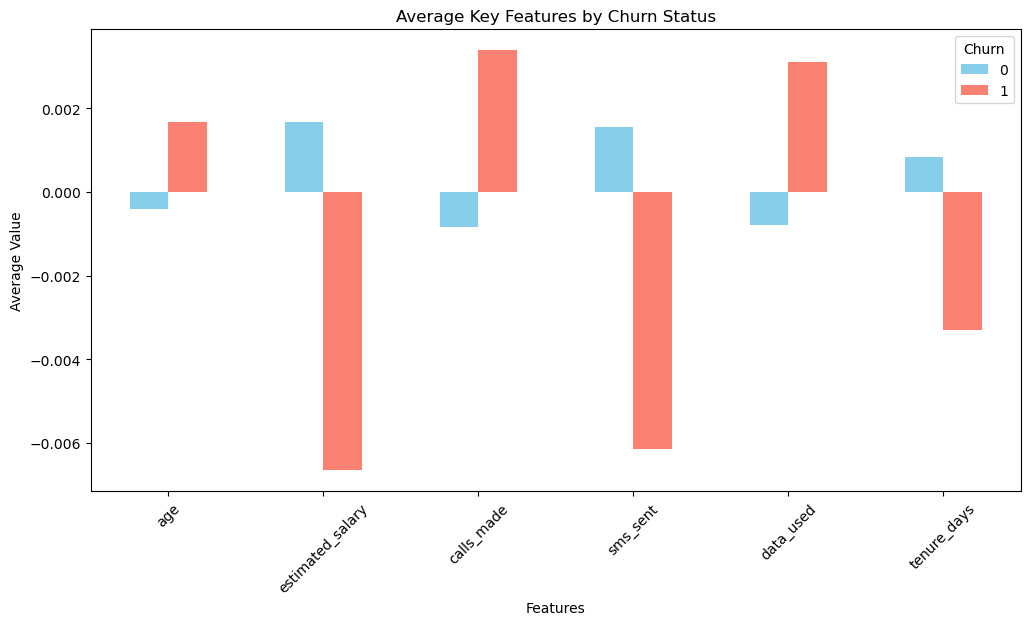

In [10]:
#3

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
data = pd.read_csv('telecom_churn.csv')

# Step 2: Initial Inspection
print("Initial Data Overview:")
print(data.head())
print("\nData Types and Missing Values:")
print(data.info())

# Step 3: Remove Irrelevant Columns
# Assuming fields like 'customer_id' are identifiers and irrelevant to churn analysis
columns_to_drop = ['customer_id', "pincode", "num_dependents"]  # Replace with actual columns to drop
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Step 4: Data Cleaning
# Identify missing values and handle them
print("\nMissing Values Before Cleaning:")
print(data.isnull().sum())

# Fill or drop missing values in relevant columns
data['data_used'] = data['data_used'].apply(lambda x: np.nan if x < 0 else x)  # Removing outliers
data['data_used'].fillna(data['data_used'].median(), inplace=True)

# Step 5: Feature Engineering
# Adding tenure in days based on `date_of_registration`
data['date_of_registration'] = pd.to_datetime(data['date_of_registration'], format='%Y-%m-%d')
data['tenure_days'] = (datetime.now() - data['date_of_registration']).dt.days
data.drop(columns=['date_of_registration'], inplace=True)  # Drop original date column if no longer needed

# Step 6: Data Transformation
# Encoding categorical variables
data = pd.get_dummies(data, columns=['telecom_partner', 'gender'], drop_first=True)

# Standardize numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['age', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used', 'tenure_days']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display cleaned data
print("\nCleaned Data Overview:")
print(data.head())

# Step 7: Exploratory Analysis
# Analyze correlations with churn

# Only keep numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Churn')
plt.show()

# Churn by Age
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='age', hue='churn', multiple='stack')
plt.title('Age Distribution by Churn')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Average values of key features by churn status
churn_analysis = data.groupby('churn')[numerical_cols].mean()
print("\nAverage Key Features by Churn Status:")
print(churn_analysis)

# Bar Plot for Average Key Features by Churn
churn_analysis.T.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('Average Key Features by Churn Status')
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.show()

First few rows of the dataset:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to

/var/folders/86/ggmx90711p73pr1jqt5jz51h0000gn/T/ipykernel_79362/1238171360.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_columns] = df[binary_columns].applymap(lambda x: 1 if x == "yes" else 0)


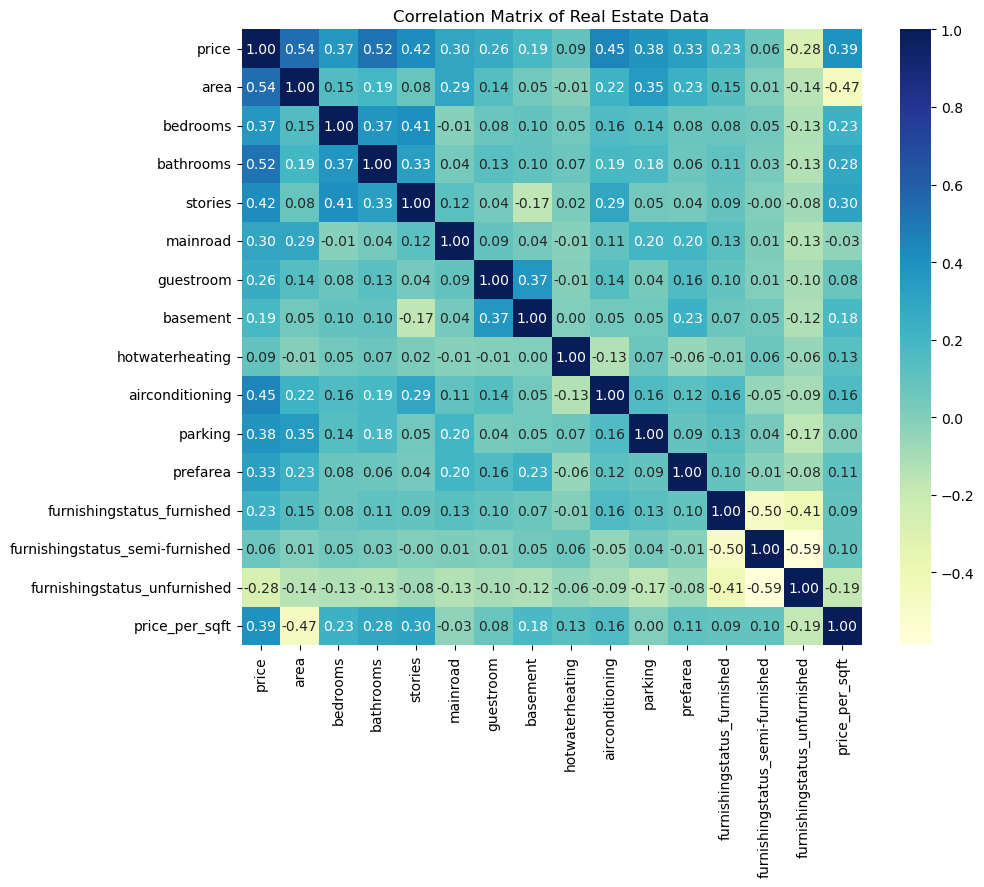

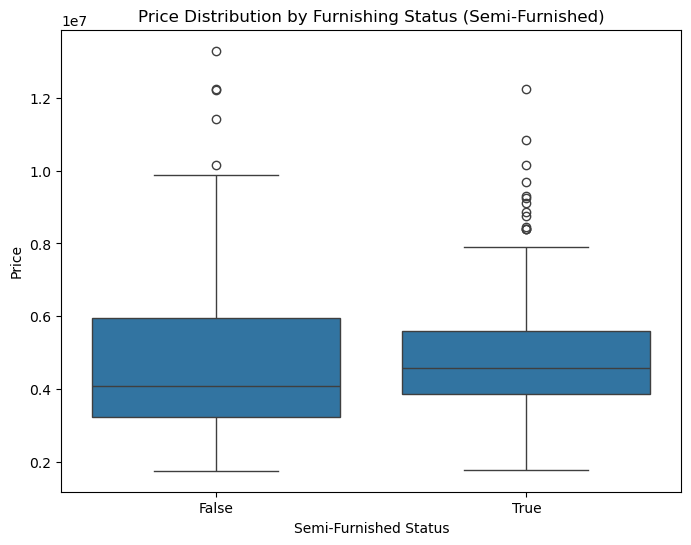

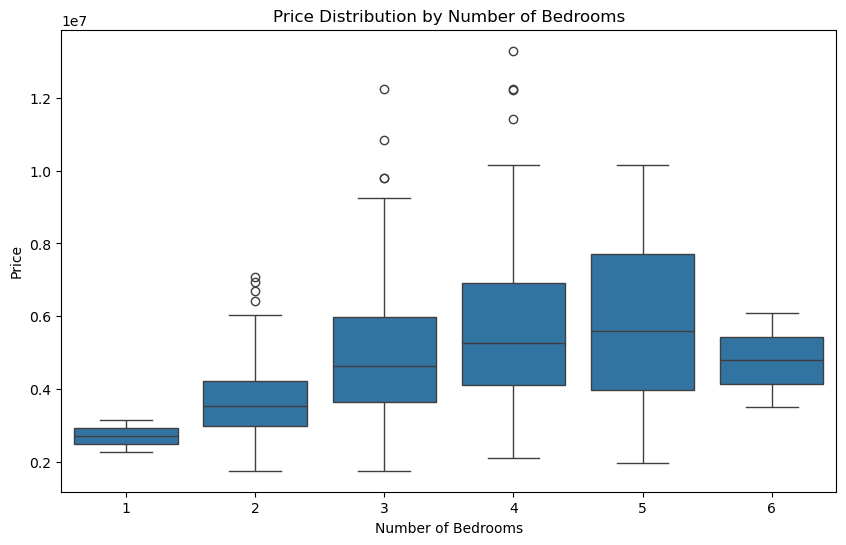

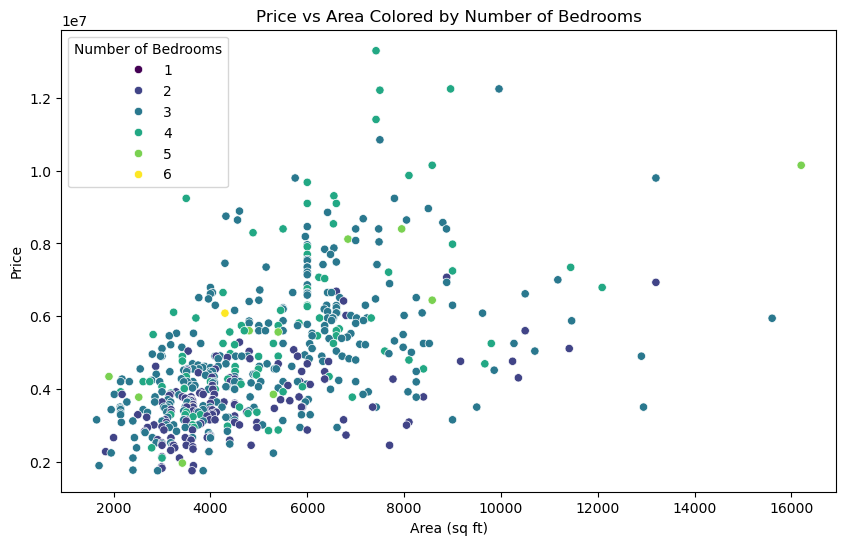

/var/folders/86/ggmx90711p73pr1jqt5jz51h0000gn/T/ipykernel_79362/1238171360.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_by_bedrooms, x='bedrooms', y='price', palette='Blues_d')


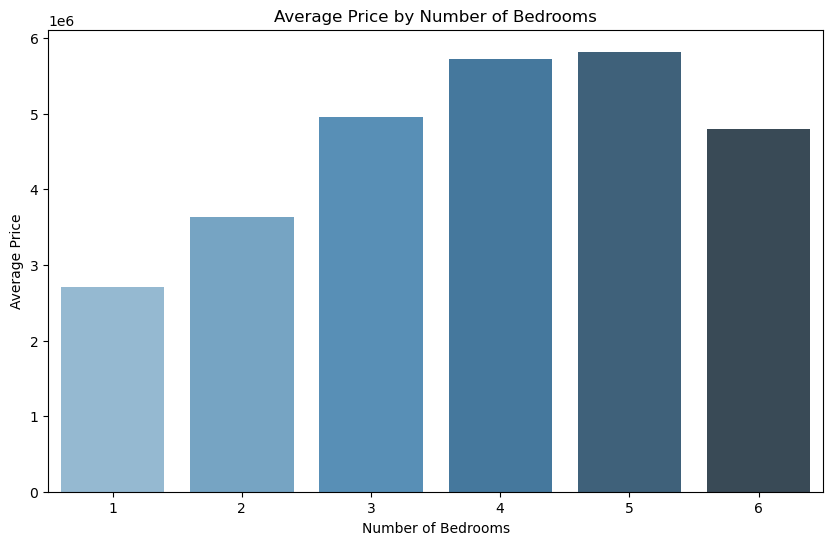

/var/folders/86/ggmx90711p73pr1jqt5jz51h0000gn/T/ipykernel_79362/1238171360.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_by_bathrooms, x='bathrooms', y='price', palette='Blues_d')


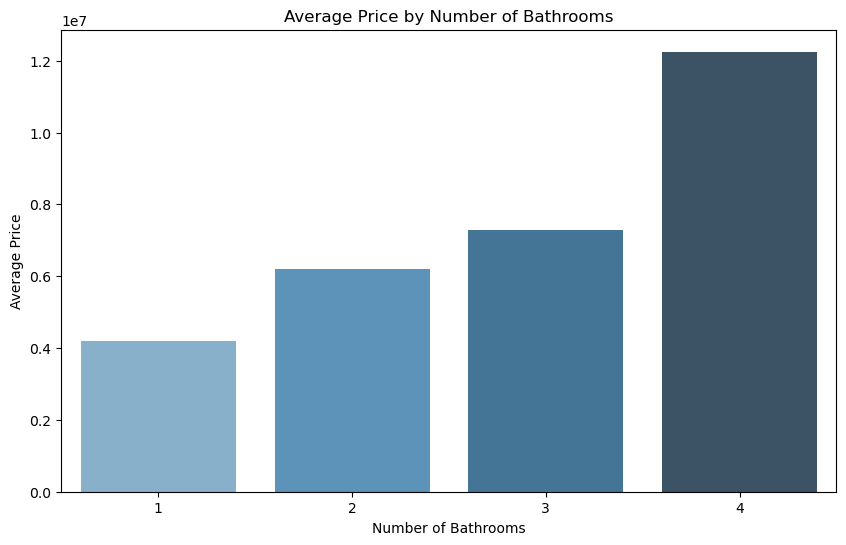

/var/folders/86/ggmx90711p73pr1jqt5jz51h0000gn/T/ipykernel_79362/1238171360.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_by_guests, x='guestroom', y='price', palette='Blues_d')


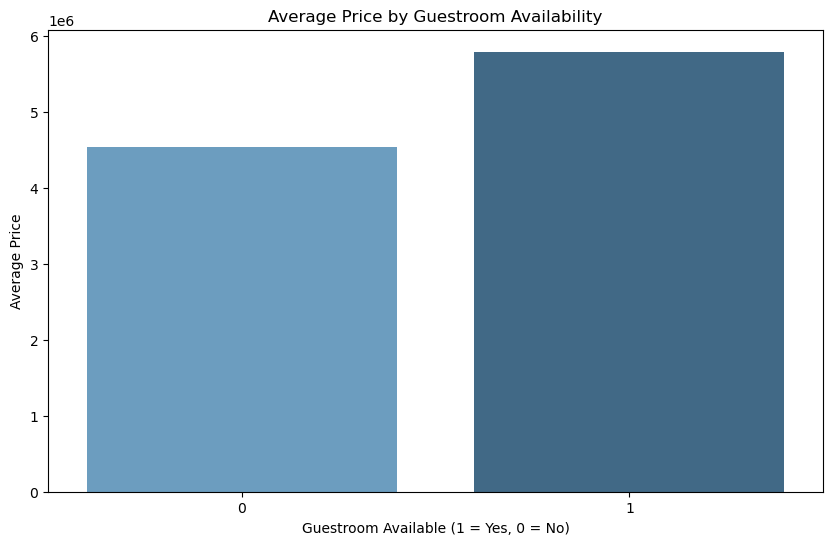

Furnishing status columns: Index(['furnishingstatus_furnished', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')


/var/folders/86/ggmx90711p73pr1jqt5jz51h0000gn/T/ipykernel_79362/1238171360.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_by_furnishing, x=avg_price_by_furnishing.columns[0], y='price', palette='Blues_d')


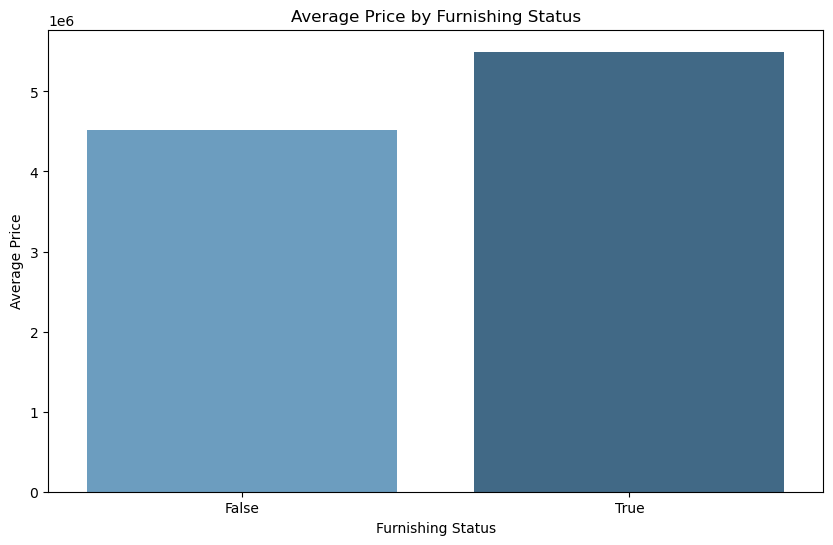

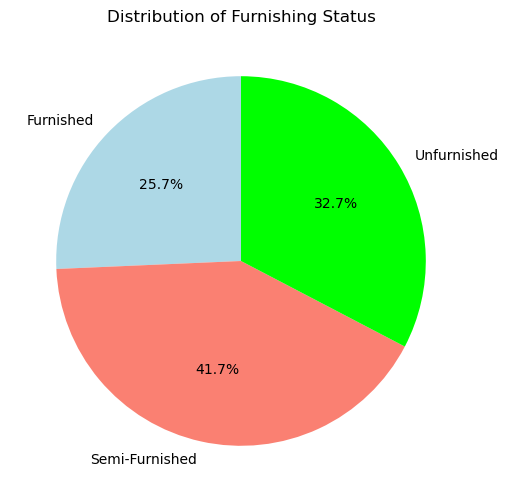

In [12]:
#4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Data from CSV
df = pd.read_csv("Real-Estate dataset.csv")

# Step 2: Inspect the Data
print("First few rows of the dataset:\n", df.head())
print("\nData Types and Missing Values:\n", df.info())

# Step 3: Data Cleaning - Handle Missing Values
# Option to drop rows with missing values
df = df.dropna()

# Step 4: Encode Categorical Variables
# Binary encoding for yes/no columns
binary_columns = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
df[binary_columns] = df[binary_columns].applymap(lambda x: 1 if x == "yes" else 0)

# One-hot encoding for furnishing status
df = pd.get_dummies(df, columns=["furnishingstatus"], drop_first=False)

# Step 5: Print the Columns to Check After Encoding
print("\nColumns after encoding:\n", df.columns)

# Step 6: Feature Engineering
# Calculate price per square foot area
df['price_per_sqft'] = df['price'] / df['area']

print(df.head())

# Step 7: Exploratory Data Analysis (EDA)

# Correlation heatmap to see relationships
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix of Real Estate Data")
plt.show()

# Boxplot to see price distribution across different furnishing statuses
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="furnishingstatus_semi-furnished", y="price")
plt.title("Price Distribution by Furnishing Status (Semi-Furnished)")
plt.xlabel("Semi-Furnished Status")
plt.ylabel("Price")
plt.show()

# Boxplot for price distribution by number of bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="bedrooms", y="price")
plt.title("Price Distribution by Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.show()

# Scatter plot for area vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="area", y="price", hue="bedrooms", palette="viridis")
plt.title("Price vs Area Colored by Number of Bedrooms")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.legend(title="Number of Bedrooms")
plt.show()

# Step 8: Bar Graphs for Average Price Analysis

# Average price by number of bedrooms
avg_price_by_bedrooms = df.groupby('bedrooms')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_bedrooms, x='bedrooms', y='price', palette='Blues_d')
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

# Average price by number of bathrooms
avg_price_by_bathrooms = df.groupby('bathrooms')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_bathrooms, x='bathrooms', y='price', palette='Blues_d')
plt.title('Average Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

# Average price by presence of guestroom
avg_price_by_guests = df.groupby('guestroom')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_guests, x='guestroom', y='price', palette='Blues_d')
plt.title('Average Price by Guestroom Availability')
plt.xlabel('Guestroom Available (1 = Yes, 0 = No)')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

# Average price by furnishing status
# Check the actual column names for furnishing status
print("Furnishing status columns:", df.filter(like='furnishingstatus').columns)

# Use the correct column name based on the previous output
avg_price_by_furnishing = df.groupby(df.filter(like='furnishingstatus').columns[0])['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_furnishing, x=avg_price_by_furnishing.columns[0], y='price', palette='Blues_d')
plt.title('Average Price by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

# Step 9: Pie Chart for Furnishing Status Distribution

# Calculate the counts for each furnishing status
furnishing_status_counts = {
    'Furnished': df['furnishingstatus_furnished'].sum(),
    'Semi-Furnished': df['furnishingstatus_semi-furnished'].sum(),
    'Unfurnished': df['furnishingstatus_unfurnished'].sum()
}

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(furnishing_status_counts.values(), labels=furnishing_status_counts.keys(), autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon', 'lime'])
plt.title('Distribution of Furnishing Status')
plt.show()


Initial Data:
   Id Mounths  PM10 in æg/m3  SO2 in æg/m3  NOx  in æg/m3   PM2.5  in æg/m3  \
0   1  Jan-17          174.0          26.4           35.0                79   
1   2  Feb-17          143.0          35.1           40.3                75   
2   3  Mar-17          142.0          32.1           30.9                59   
3   4  Apr-17          117.0          50.9           36.3                75   
4   5  May-17            NaN          41.6           25.2                53   

   Ammonia - NH3  in æg/m3  O3   in æg/m3  CO  in mg/m3   Benzene  in æg/m3  \
0                     25.0          107.6           0.9                 0.7   
1                     31.0          103.0           0.9                 0.9   
2                     26.0           80.7           0.8                 0.5   
3                     36.0           79.5           0.9                 0.7   
4                     28.0           70.0           0.5                 0.5   

     AQI  
0  149.0  
1  129.0  
2  

/var/folders/86/ggmx90711p73pr1jqt5jz51h0000gn/T/ipykernel_79362/1359461168.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


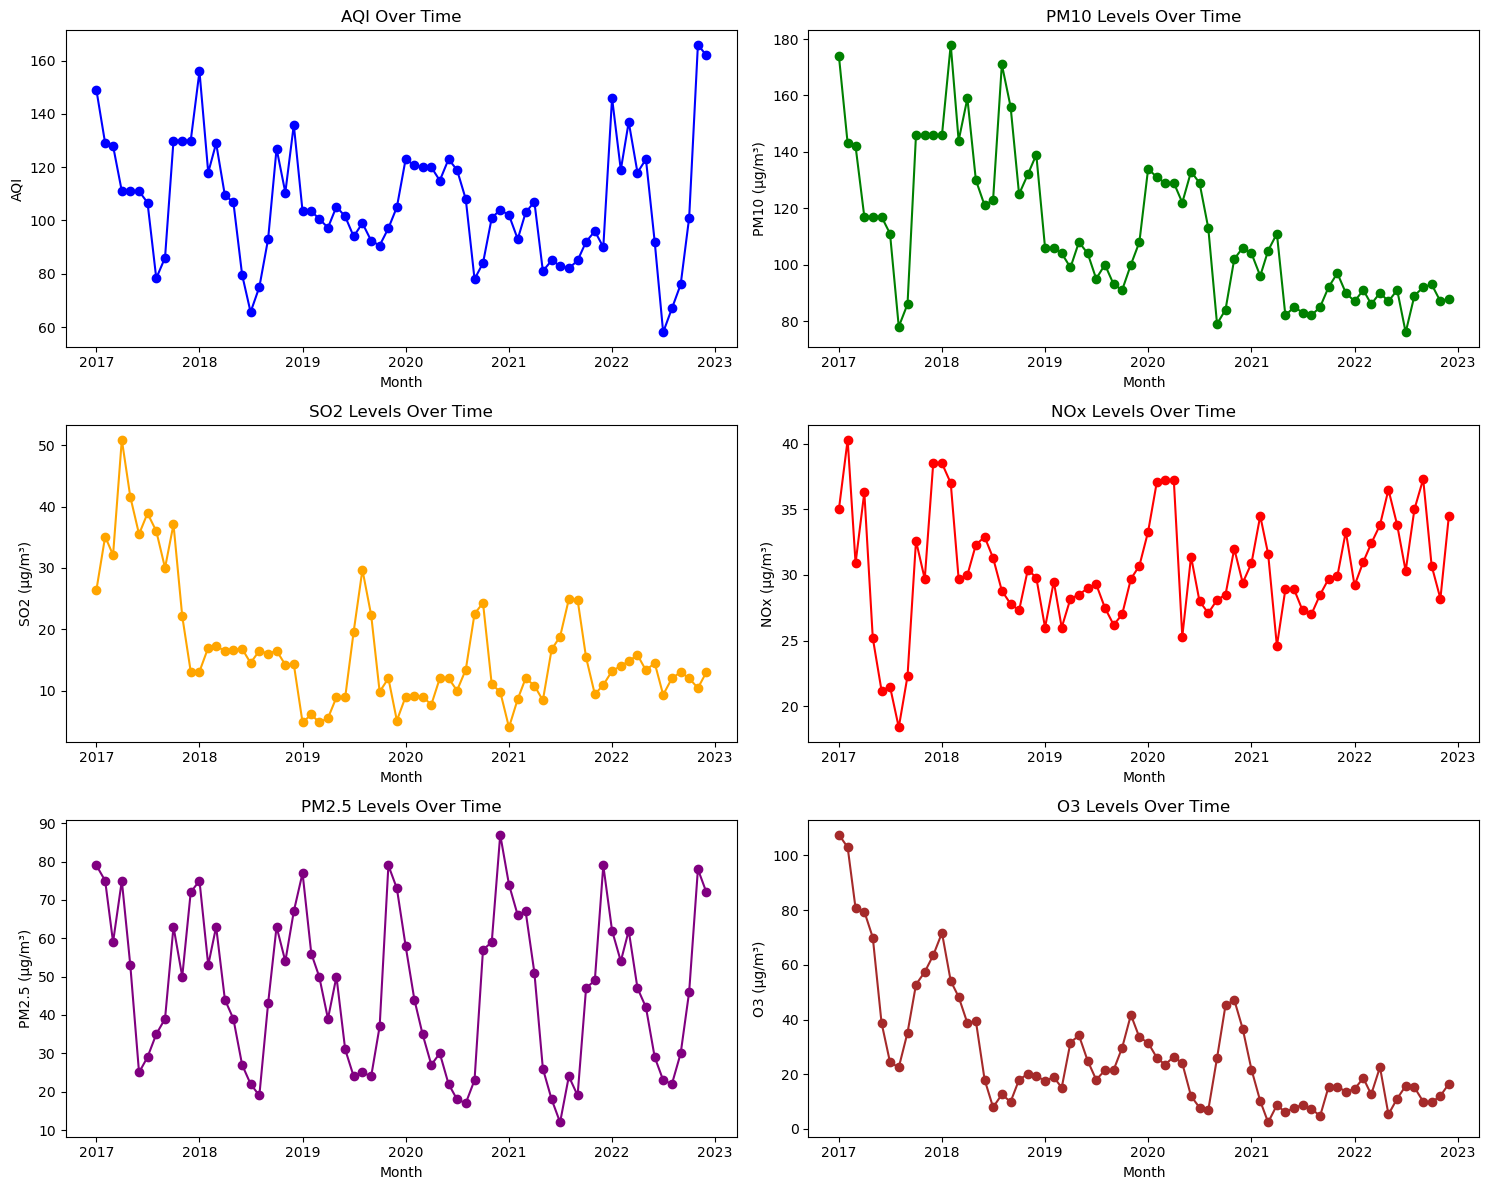

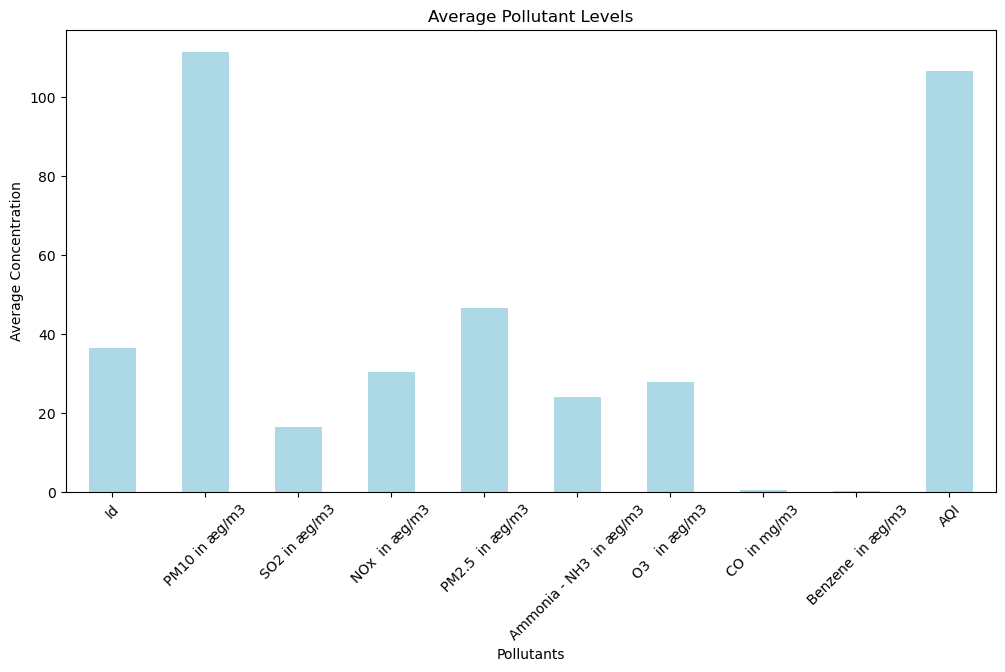

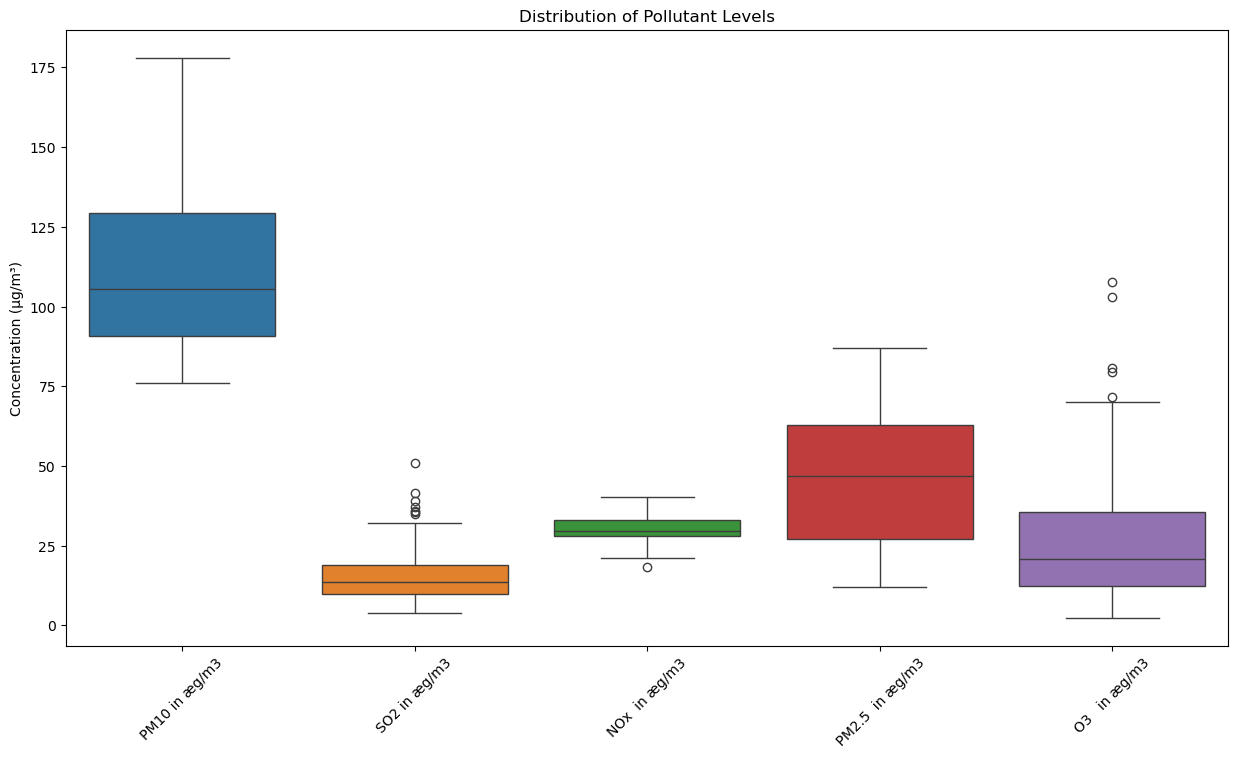

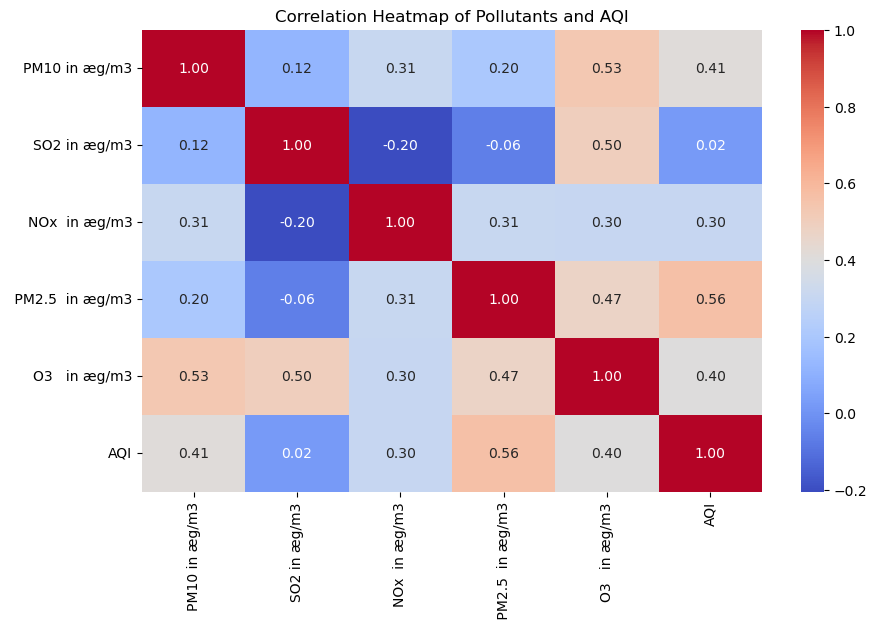

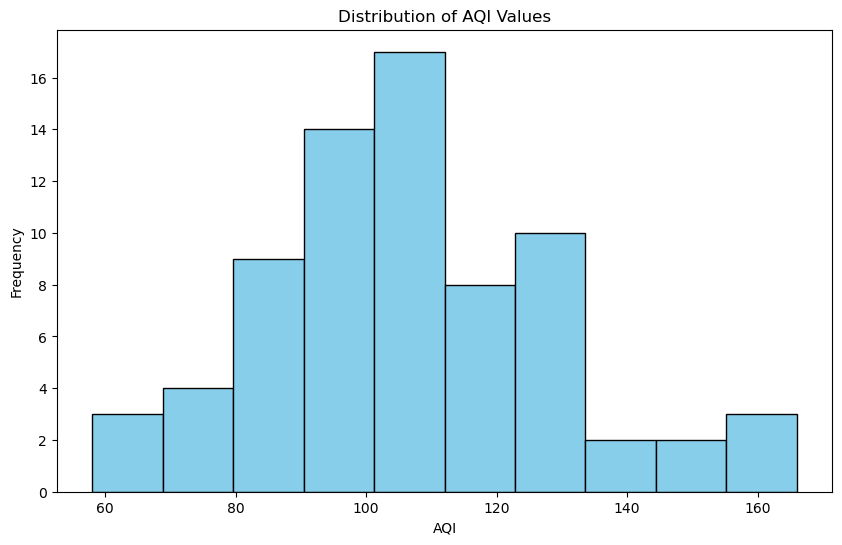

In [14]:
#5

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Data from CSV
df = pd.read_csv('AQI Data Set.csv')

# Display the first few rows of the dataframe
print("Initial Data:")
print(df.head())

# Step 2: Data Cleaning
# Filling missing values using forward fill method
df.fillna(method='ffill', inplace=True)

# Convert 'Months' to datetime format
df['Mounths'] = pd.to_datetime(df['Mounths'], format='%b-%y')

# Step 3: Data Visualization
# Set up the figure and axes for multiple plots
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

# Plotting AQI over the months
axs[0, 0].plot(df['Mounths'], df['AQI'], marker='o', color='blue')
axs[0, 0].set_title('AQI Over Time')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('AQI')

# Plotting PM10 over the months
axs[0, 1].plot(df['Mounths'], df['PM10 in æg/m3'], marker='o', color='green')
axs[0, 1].set_title('PM10 Levels Over Time')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('PM10 (µg/m³)')

# Plotting SO2 over the months
axs[1, 0].plot(df['Mounths'], df['SO2 in æg/m3'], marker='o', color='orange')
axs[1, 0].set_title('SO2 Levels Over Time')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('SO2 (µg/m³)')

# Plotting NOx over the months
axs[1, 1].plot(df['Mounths'], df['NOx  in æg/m3'], marker='o', color='red')
axs[1, 1].set_title('NOx Levels Over Time')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('NOx (µg/m³)')

# Plotting PM2.5 over the months
axs[2, 0].plot(df['Mounths'], df[' PM2.5  in æg/m3'], marker='o', color='purple')
axs[2, 0].set_title('PM2.5 Levels Over Time')
axs[2, 0].set_xlabel('Month')
axs[2, 0].set_ylabel('PM2.5 (µg/m³)')

# Plotting O3 over the months
axs[2, 1].plot(df['Mounths'], df['O3   in æg/m3'], marker='o', color='brown')
axs[2, 1].set_title('O3 Levels Over Time')
axs[2, 1].set_xlabel('Month')
axs[2, 1].set_ylabel('O3 (µg/m³)')

# Adjust layout
plt.tight_layout()
plt.show()

# Additional Visualizations

# Bar plot for average pollutant levels per month
average_pollutants = df.mean(numeric_only=True)
plt.figure(figsize=(12, 6))
average_pollutants.plot(kind='bar', color='lightblue')
plt.title('Average Pollutant Levels')
plt.xlabel('Pollutants')
plt.ylabel('Average Concentration')
plt.xticks(rotation=45)
plt.show()

# Box plot for pollutant levels
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['PM10 in æg/m3', 'SO2 in æg/m3', 'NOx  in æg/m3', ' PM2.5  in æg/m3', 'O3   in æg/m3']])
plt.title('Distribution of Pollutant Levels')
plt.ylabel('Concentration (µg/m³)')
plt.xticks(rotation=45)
plt.show()

# Heatmap for correlations
correlation_matrix = df[['PM10 in æg/m3', 'SO2 in æg/m3', 'NOx  in æg/m3', ' PM2.5  in æg/m3', 'O3   in æg/m3', 'AQI']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Pollutants and AQI')
plt.show()

# Histogram for AQI distribution
plt.figure(figsize=(10, 6))
plt.hist(df['AQI'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of AQI Values')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

Initial Data:
  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon  

Missing Values:
invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

Sales Performance by Region:
       shopping_m

/var/folders/86/ggmx90711p73pr1jqt5jz51h0000gn/T/ipykernel_79362/4110835419.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_regions, x='total_sales', y='shopping_mall', palette='viridis')


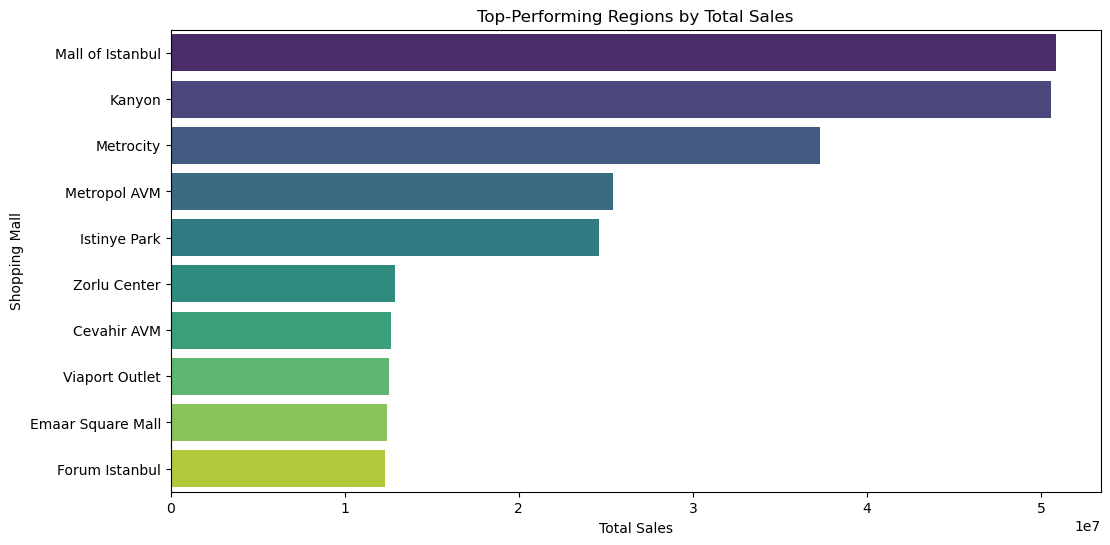

In [16]:
#6

import pandas as pd

# Step 1: Load the Data from CSV
df = pd.read_csv('retail_sales_data.csv')

# Display the first few rows of the dataframe
print("Initial Data:")
print(df.head())

# Step 2: Data Cleaning
# Convert 'invoice_date' to datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Optionally, handle missing values if any
# df.dropna(inplace=True)  # Uncomment if you want to drop rows with missing values

# Step 3: Data Aggregation
# Calculate total sales per region (shopping mall)
df['total_sales'] = df['quantity'] * df['price']
sales_per_region = df.groupby('shopping_mall').agg(
    total_quantity=('quantity', 'sum'),
    total_sales=('total_sales', 'sum'),
    total_transactions=('invoice_no', 'nunique')
).reset_index()

# Step 4: Identify Top-Performing Regions
top_regions = sales_per_region.sort_values(by='total_sales', ascending=False)

# Display the aggregated sales performance
print("\nSales Performance by Region:")
print(top_regions)

# Optionally, visualize the top regions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=top_regions, x='total_sales', y='shopping_mall', palette='viridis')
plt.title('Top-Performing Regions by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Shopping Mall')
plt.show()